In [1]:
!pip install osmnx geopandas matplotlib contextily

In [12]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Polygon, LineString

def get_coastline(city_name):
    # Define the query to specifically fetch "natural" features which include coastlines
    coast_query = {
        'natural': 'water'
    }
    # Use osmnx to download the coastline data
    coastline_gdf = ox.geometries_from_place(city_name, coast_query)
    return coastline_gdf
    
def get_assets(city_name):
    # Fetch points of interest which could include various types of assets
    assets_query = {
        'amenity': True,
        'building': True,
        'highway': True,
    }
    assets_gdf = ox.geometries_from_place(city_name, assets_query)
    return assets_gdf


# Fetch assets
durres_assets = get_assets("Tiranë, Albania")
durres_assets = durres_assets.to_crs(epsg=32633)  # Convert CRS to match the coastline
durres_coastline = get_coastline("Tiranë, Albania")

/tmp/ipykernel_37156/2062442538.py:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  assets_gdf = ox.geometries_from_place(city_name, assets_query)
/tmp/ipykernel_37156/2062442538.py:11: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  coastline_gdf = ox.geometries_from_place(city_name, coast_query)


In [13]:
# Convert GeoDataFrame to an appropriate CRS that uses meters
durres_coastline = durres_coastline.to_crs(epsg=32633)  # UTM zone 33N for Durres

# Create a 20-meter buffer around the coastline
buffer_zone = durres_coastline.buffer(40)


In [14]:

# Filter assets to find those affected by the buffer zone
affected_assets = durres_assets[durres_assets.intersects(buffer_zone.unary_union)]


/tmp/ipykernel_37156/2525356069.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left')


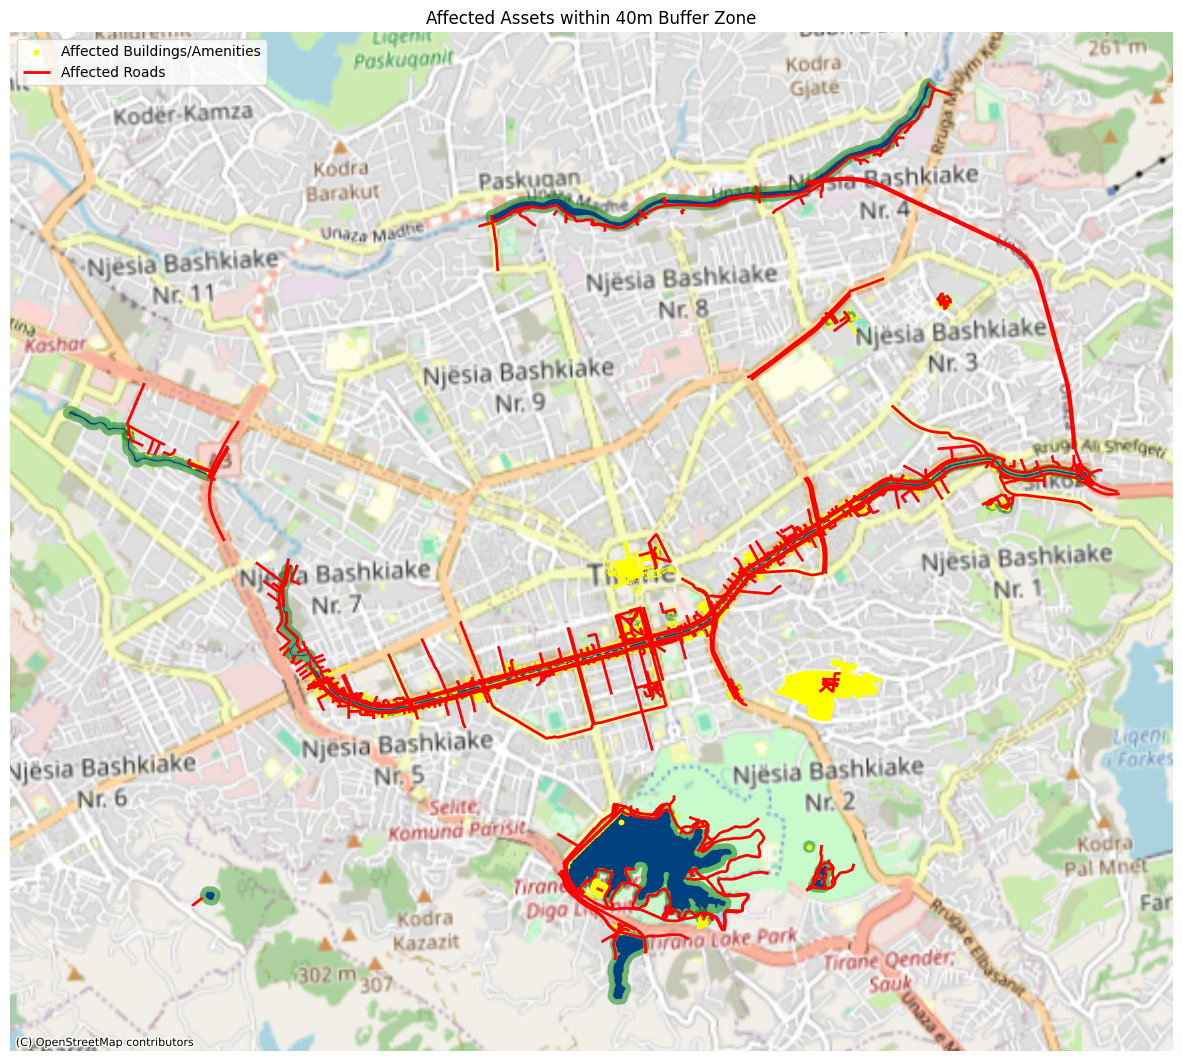

In [15]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(15, 15))

# Plot the coastline
durres_coastline.plot(ax=ax, color='blue', label='Coastline')

# Plot the buffer zone
buffer_zone.plot(ax=ax, color='green', alpha=0.5, label='40m Buffer Zone')

# Plot affected assets, distinguish between roads and other types
affected_assets[affected_assets['geometry'].geom_type != 'LineString'].plot(ax=ax, color='yellow', markersize=10, label='Affected Buildings/Amenities')
affected_assets[affected_assets['geometry'].geom_type == 'LineString'].plot(ax=ax, color='red', linewidth=2, label='Affected Roads')

# Add a basemap
ctx.add_basemap(ax, crs=durres_coastline.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Adjust layout
ax.set_title('Affected Assets within 40m Buffer Zone')
ax.set_axis_off()
plt.legend(loc='upper left')
plt.show()


In [5]:
import osmnx as ox
import geopandas as gpd

def get_water_bodies(city_name):
    # Fetch water bodies
    water_body_query = {
        'natural': ['water', 'riverbank'],
        'water': ['lake', 'river']
    }
    water_bodies_gdf = ox.geometries_from_place(city_name, water_body_query)
    return water_bodies_gdf
    
def create_buffer(water_bodies_gdf, buffer_distance=20):
    # Create a buffer zone around the water bodies
    buffer_zone = water_bodies_gdf.buffer(buffer_distance)  # Buffer in meters
    return buffer_zone
    
# Fetch water bodies for Shkodra
shkodra_water_bodies = get_water_bodies("Shkodra, Albania")
shkodra_water_bodies = shkodra_water_bodies.to_crs(epsg=32634)  # UTM zone 34N for Albania


# Create buffer zone around water bodies in Shkodra
shkodra_buffer_zone = create_buffer(shkodra_water_bodies, 40)


/tmp/ipykernel_37156/2654829970.py:10: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  water_bodies_gdf = ox.geometries_from_place(city_name, water_body_query)


In [9]:
def get_assets(city_name):
    # Fetch assets, including roads
    tags = {'amenity': True, 'building': True, 'highway': True}
    assets_gdf = ox.geometries_from_place(city_name, tags)
    return assets_gdf.to_crs(epsg=32634)  # Convert to the same UTM CRS

# Fetch assets for Shkodra
shkodra_assets = get_assets("Shkodra, Albania")

# Identify assets affected by the water body buffers
affected_assets = shkodra_assets[shkodra_assets.intersects(shkodra_buffer_zone.unary_union)]


/tmp/ipykernel_37156/1030238975.py:4: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  assets_gdf = ox.geometries_from_place(city_name, tags)


/tmp/ipykernel_37156/3369174396.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left')


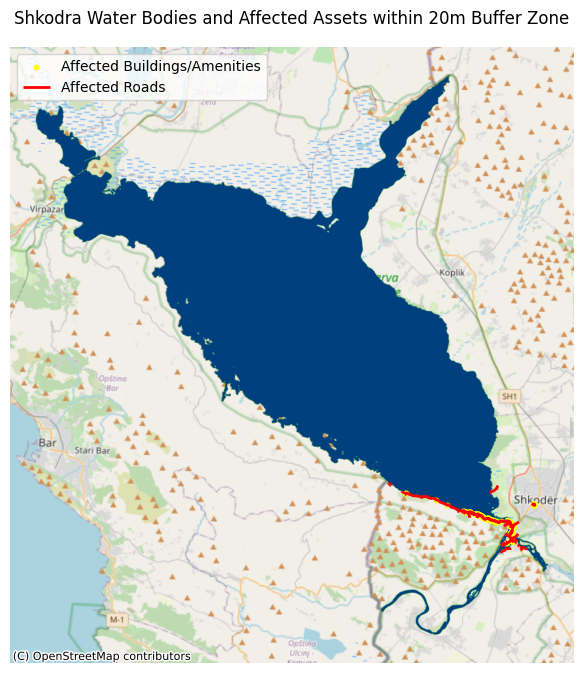

In [10]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(12, 8))

# Plot water bodies
shkodra_water_bodies.plot(ax=ax, color='blue', label='Water Bodies')

# Plot buffer zones
shkodra_buffer_zone.plot(ax=ax, color='green', alpha=0.5, label='20m Buffer Zone')

# Plot affected assets
affected_assets[affected_assets['geometry'].geom_type != 'LineString'].plot(ax=ax, color='yellow', markersize=10, label='Affected Buildings/Amenities')
affected_assets[affected_assets['geometry'].geom_type == 'LineString'].plot(ax=ax, color='red', linewidth=2, label='Affected Roads')

# Add a basemap
ctx.add_basemap(ax, crs=shkodra_water_bodies.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Adjust layout
ax.set_title('Shkodra Water Bodies and Affected Assets within 40m Buffer Zone')
ax.set_axis_off()
plt.legend(loc='upper left')
plt.show()

In [17]:
!pip install ipyleaflet
!jupyter nbextension enable --py --sys-prefix ipyleaflet  # if not already enabled

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [18]:
from ipyleaflet import Map, GeoJSON, LayersControl, WidgetControl
from ipywidgets import Text, HTML
import geopandas as gpd
import json

# Load your data (assuming it's already in GeoDataFrame `gdf`)
# Example: shkodra_water_bodies, shkodra_buffer_zone, affected_assets

# Convert GeoDataFrames to GeoJSON
water_bodies_geojson = json.loads(shkodra_water_bodies.to_json())
buffer_zone_geojson = json.loads(shkodra_buffer_zone.to_json())
affected_assets_geojson = json.loads(affected_assets.to_json())

# Create a map centered on Shkodra
center = (42.068, 19.512)  # Latitude and Longitude of Shkodra
m = Map(center=center, zoom=13)

# Create GeoJSON layers
water_body_layer = GeoJSON(data=water_bodies_geojson, style={'color': 'blue', 'opacity': 0.5, 'weight': 1.5}, name="Water Bodies")
buffer_zone_layer = GeoJSON(data=buffer_zone_geojson, style={'color': 'green', 'opacity': 0.3, 'fillOpacity': 0.1}, name="Buffer Zone")
assets_layer = GeoJSON(data=affected_assets_geojson, style={'color': 'red', 'opacity': 0.8}, name="Affected Assets")

# Add layers to the map
m.add_layer(water_body_layer)
m.add_layer(buffer_zone_layer)
m.add_layer(assets_layer)

# Add layer control
m.add_control(LayersControl())

# Widget to display feature properties on click
html = HTML('Click on an asset')
html.layout.margin = '0px 20px 20px 20px'
control = WidgetControl(widget=html, position='bottomright')
m.add_control(control)

# Define a function to update the widget with feature properties
def update_html(feature, **kwargs):
    html.value = f"""
    <h4>Asset Information:</h4>
    Type: {feature['properties'].get('type', 'N/A')}<br>
    Impact Level: {feature['properties'].get('impact_level', 'N/A')}
    """

# Connect click events
water_body_layer.on_click(update_html)
buffer_zone_layer.on_click(update_html)
assets_layer.on_click(update_html)

m  # Display the map


/home/pomodoren/Desktop/ResMI/resmi/venv/lib/python3.12/site-packages/ipyleaflet/leaflet.py:2914: DeprecationWarning: add_layer is deprecated, use add instead
  warnings.warn("add_layer is deprecated, use add instead", DeprecationWarning)
/home/pomodoren/Desktop/ResMI/resmi/venv/lib/python3.12/site-packages/ipyleaflet/leaflet.py:2995: DeprecationWarning: add_control is deprecated, use add instead
  warnings.warn("add_control is deprecated, use add instead", DeprecationWarning)


Map(center=[42.068, 19.512], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

In [12]:
affected_assets

geometry  \
element_type osmid                                                           
node         3820715643                     POINT (375048.967 4655992.751)   
             3820887506                     POINT (376730.900 4658072.534)   
             3820887509                     POINT (376739.382 4658074.385)   
             3820887513                     POINT (376724.295 4658074.882)   
             3820887514                     POINT (376750.412 4658080.424)   
...                                                                    ...   
way          818687888   LINESTRING (372378.133 4657499.287, 372374.641...   
             818687892   LINESTRING (372597.706 4657400.431, 372577.822...   
             818694908   POLYGON ((373955.363 4656954.718, 373955.012 4...   
             929672306   LINESTRING (372750.973 4657422.864, 372749.182...   
             978464317   LINESTRING (375402.167 4655513.409, 375396.152...   

                        barrier     bicycle emergency        foot material  \
element_type osmid                                                           
node         3820715643     NaN          no       NaN         NaN      NaN   
             3820887506     NaN         NaN       NaN         NaN     wood   
             3820887509     NaN         NaN       NaN         NaN     wood   
             3820887513     NaN         NaN       NaN         NaN     wood   
             3820887514     NaN         NaN       NaN         NaN     wood   
...                         ...         ...       ...         ...      ...   
way          818687888      NaN         NaN       NaN         NaN      NaN   
             818687892      NaN  designated       NaN  designated      NaN   
             818694908      NaN         NaN       NaN         NaN      NaN   
             929672306      NaN  designated       NaN  designated      NaN   
             978464317      NaN         NaN       NaN         NaN      NaN   

                                                                    source  \
element_type osmid                                                           
node         3820715643  bing;mapbox-satellite;digitalglobe;survey;know...   
             3820887506                                    bing;survey;gps   
             3820887509                                    bing;survey;gps   
             3820887513                                    bing;survey;gps   
             3820887514                                    bing;survey;gps   
...                                                                    ...   
way          818687888                                                 NaN   
             818687892                                     bing;survey;gps   
             818694908   bing;mapbox-satellite;digitalglobe;survey;know...   
             929672306                                                 NaN   
             978464317                                                 NaN   

                                                            source_ref:url  \
element_type osmid                                                           
node         3820715643  https://www.flickr.com/photos/openstreetmap-al...   
             3820887506  https://www.flickr.com/photos/134902422@N04/ma...   
             3820887509  https://www.flickr.com/photos/134902422@N04/ma...   
             3820887513  https://www.flickr.com/photos/134902422@N04/ma...   
             3820887514  https://www.flickr.com/photos/134902422@N04/ma...   
...                                                                    ...   
way          818687888                                                 NaN   
             818687892   https://www.flickr.com/photos/134902422@N04/ma...   
             818694908   https://www.flickr.com/photos/openstreetmap-al...   
             929672306                                                 NaN   
             978464317                                                 NaN   

      

In [19]:
import geopandas as gpd

# Assuming affected_assets is already in an appropriate CRS for length calculation (e.g., UTM)
# Filter road infrastructure
affected_roads = affected_assets[affected_assets['geometry'].geom_type == 'LineString']

# Calculate the length of each road segment in meters
affected_roads['length_m'] = affected_roads.geometry.length

# Calculate the total length of affected road infrastructure
total_affected_road_length = affected_roads['length_m'].sum()

print(f"Total length of affected road infrastructure: {total_affected_road_length:.2f} meters")


Total length of affected road infrastructure: 18521.96 meters


/home/pomodoren/Desktop/ResMI/resmi/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [31]:
affected_roads.geometry.length

element_type  osmid    
way           25219078     177.468160
              28079662     204.088019
              48407527     146.578366
              136875585    414.900030
              173215694     33.031366
                              ...    
              818687887    232.505917
              818687888     31.792152
              818687892    611.016860
              929672306      5.633675
              978464317     85.971726
Length: 71, dtype: float64

TypeError: 'value' must be an instance of str or bytes, not a tuple

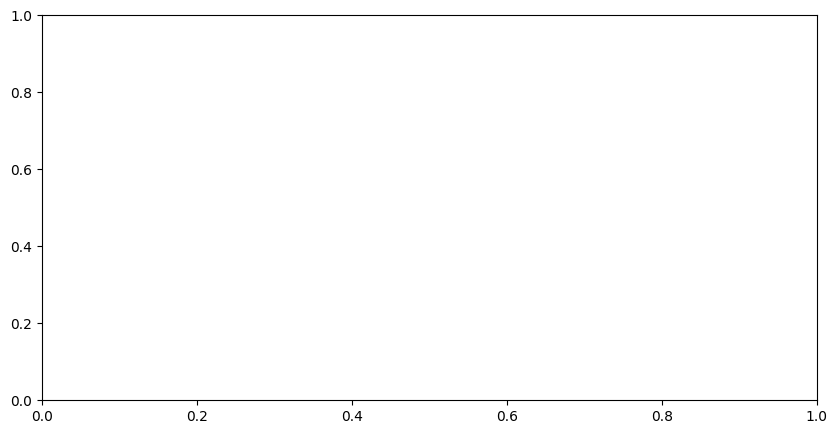

In [32]:
import matplotlib.pyplot as plt

# Plot the length of affected roads
plt.figure(figsize=(10, 5))
plt.scatter(affected_roads.index, affected_roads.geometry.length.sum())
plt.title('Length of Affected Road Segments')
plt.xlabel('Road Segment ID')
plt.ylabel('Length in Meters')
plt.show()


In [21]:
# Example: Each asset has a 'tags' column which is a dictionary of tag names and values
# We first extract these tags into a long series
all_tags = affected_assets['tags'].explode()

# Count the occurrences of each tag
tag_counts = all_tags.value_counts()

# Get the top 5 tags
top_five_tags = tag_counts.head(5)

print("Top 5 Tags among Affected Assets:")

KeyError: 'tags'